In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
file = pd.read_csv(r'C:\Users\atiya\Desktop\NTI\Task\UdemyCoursesDataset.csv')

In [3]:
file.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [4]:
df = file.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [6]:
df.describe()

,course_id,num_subscribers,num_reviews,num_lectures
count,3.682000e+03,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,3194.230310,156.093156,40.065182
std,3.436355e+05,9499.378361,934.957204,50.373299
min,8.324000e+03,0.000000,0.000000,0.000000
25%,4.078430e+05,110.250000,4.000000,15.000000
50%,6.885580e+05,911.500000,18.000000,25.000000
75%,9.617515e+05,2540.250000,67.000000,45.000000
max,1.282064e+06,268923.000000,27445.000000,779.000000


In [7]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [8]:
df["month"] = df["published_timestamp"].dt.month
df["year"] = df["published_timestamp"].dt.year

In [9]:
df['content_duration'] = df['content_duration'].str.extract('(\d+\.?\d*)').astype(float)

In [10]:
df['price'] = pd.to_numeric(df['price'].replace('Free', 0))

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   is_paid              3682 non-null   bool               
 3   price                3682 non-null   int64              
 4   num_subscribers      3682 non-null   int64              
 5   num_reviews          3682 non-null   int64              
 6   num_lectures         3682 non-null   int64              
 7   level                3682 non-null   object             
 8   content_duration     3682 non-null   float64            
 9   published_timestamp  3682 non-null   datetime64[ns, UTC]
 10  subject              3682 non-null   object             
 11  month                3682 non-null   int32              
 12  year                

In [12]:
df.drop(columns=['course_id'], inplace=True)

In [13]:
df['is_paid'].value_counts()

is_paid
True     3372
False     310
Name: count, dtype: int64

In [14]:
df['level'].value_counts()

level
All Levels            1932
Beginner Level        1271
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [15]:
df['subject'].value_counts()

subject
Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

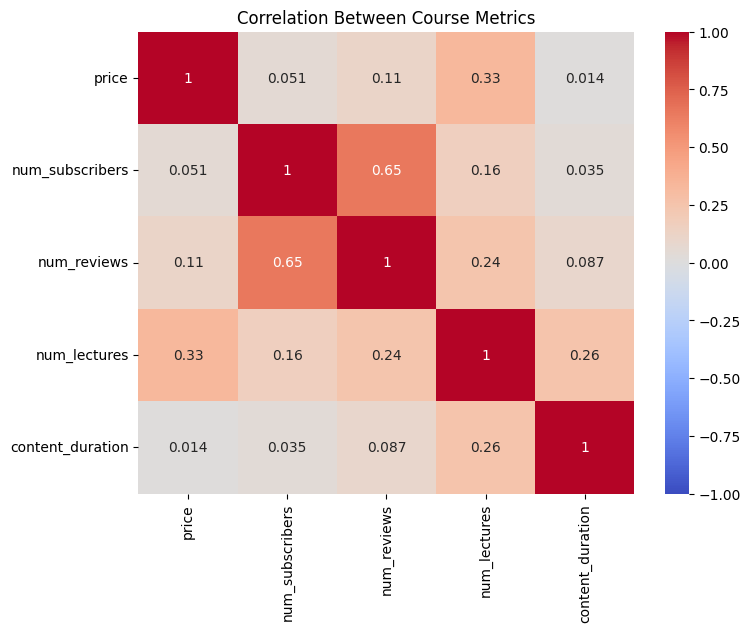

In [16]:
corr = df[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Course Metrics')
plt.show()

In [17]:
cat_col = ['is_paid', 'level', 'subject']
num_col = ['content_duration', 'price', 'num_subscribers', 'num_reviews', 'num_lectures']

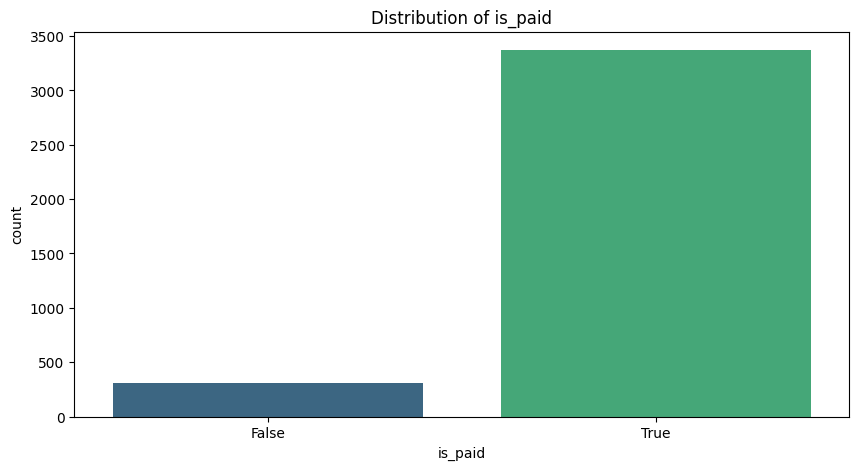

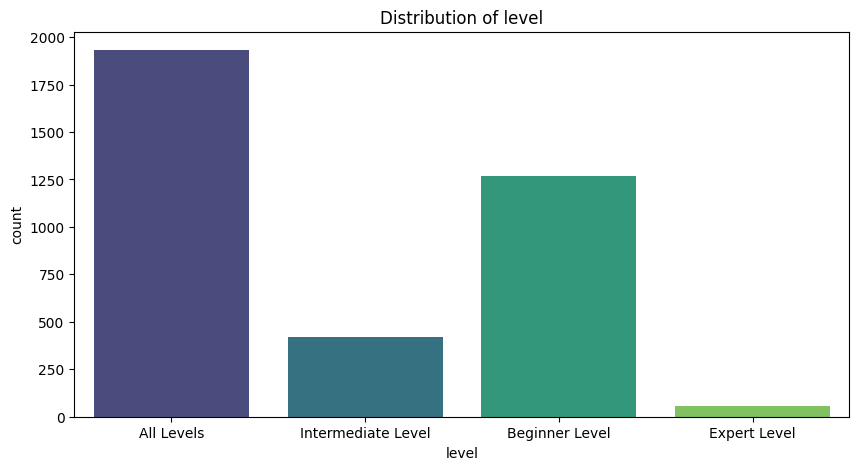

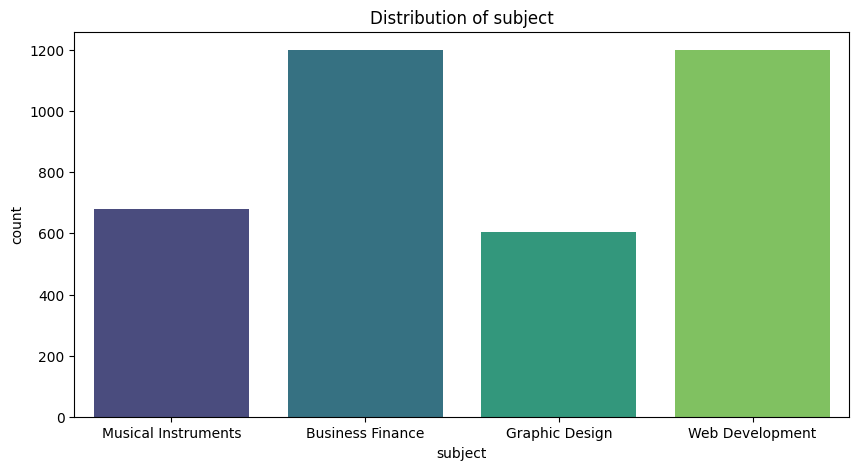

In [18]:
for i in range(len(cat_col)):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=cat_col[i], data=df, palette='viridis')
    plt.title(f'Distribution of {cat_col[i]}')
    plt.show()

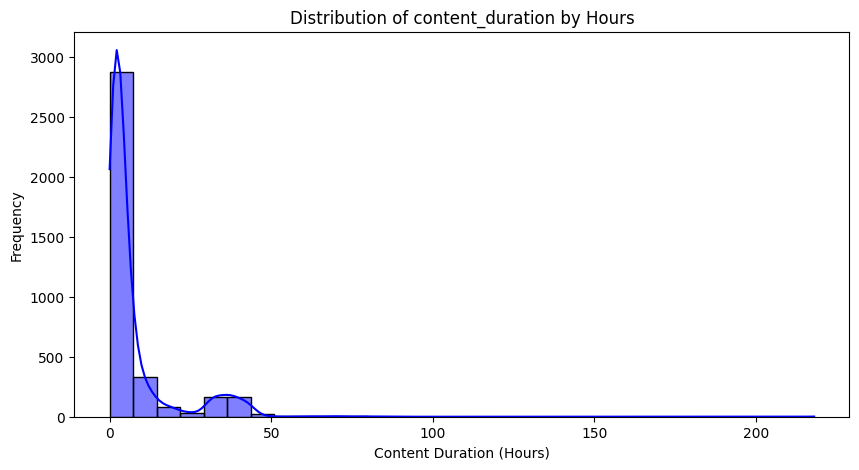

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['content_duration'], kde=True, color='blue', bins=30)
plt.title(f'Distribution of content_duration by Hours')
plt.xlabel('Content Duration (Hours)')
plt.ylabel('Frequency')
plt.show()

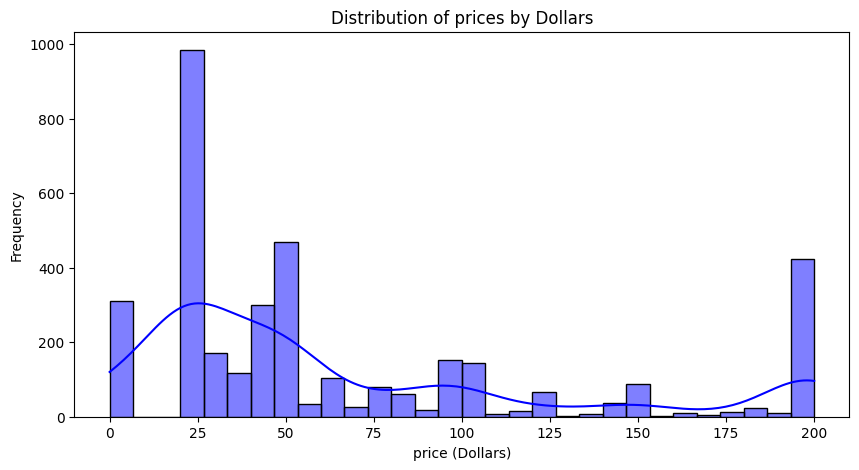

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True, color='blue', bins=30)
plt.title(f'Distribution of prices by Dollars')
plt.xlabel('price (Dollars)')
plt.ylabel('Frequency')
plt.show()

In [21]:
metrics = [
    ('num_subscribers', 'Top 10 Courses by Subscribers'),
    ('num_reviews', 'Top 10 Courses by Reviews'),
    ('num_lectures', 'Top 10 Courses by Number of Lectures'),
    ('content_duration', 'Top 10 Courses by Content Duration (Hours)')
]

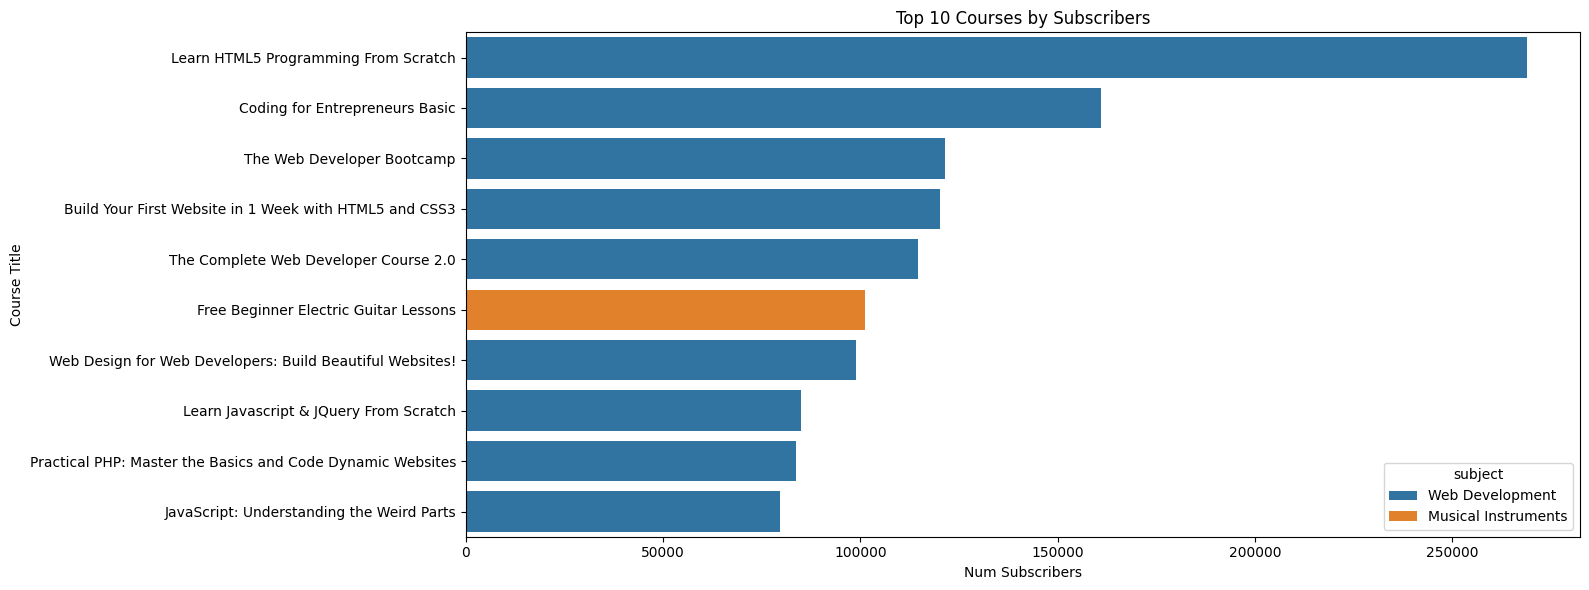

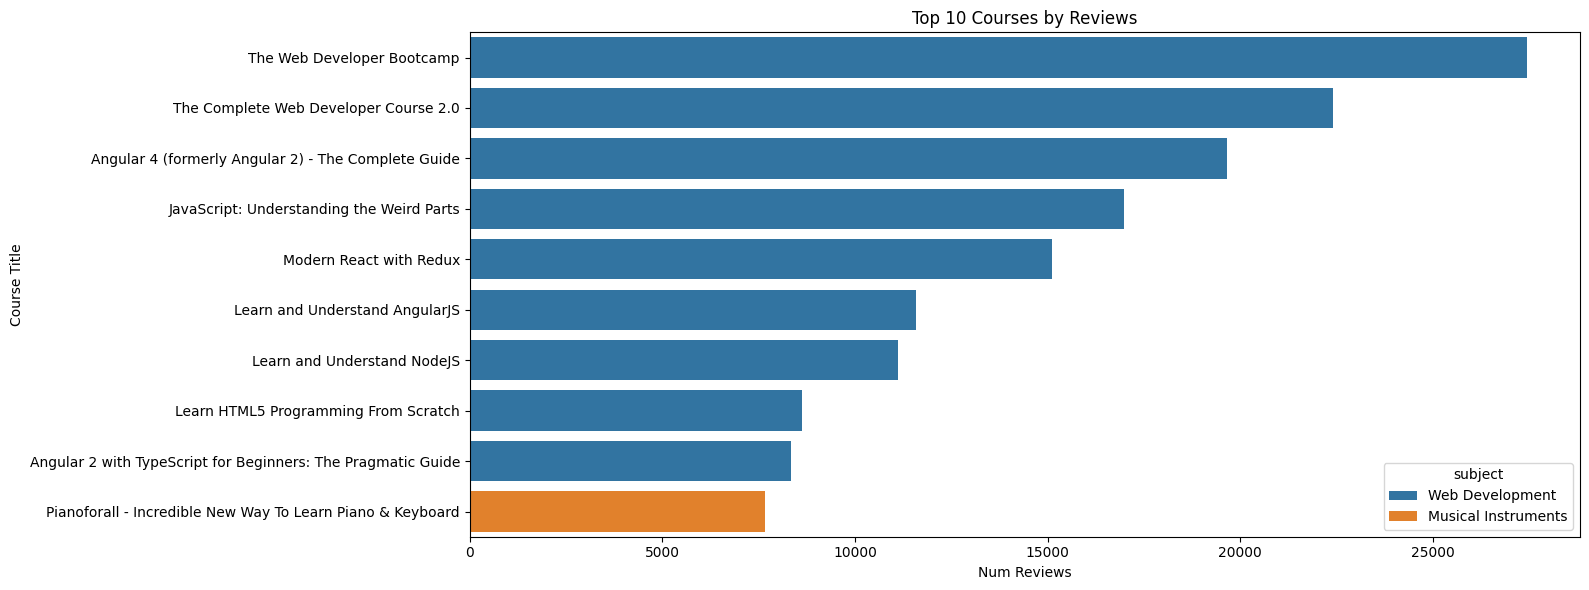

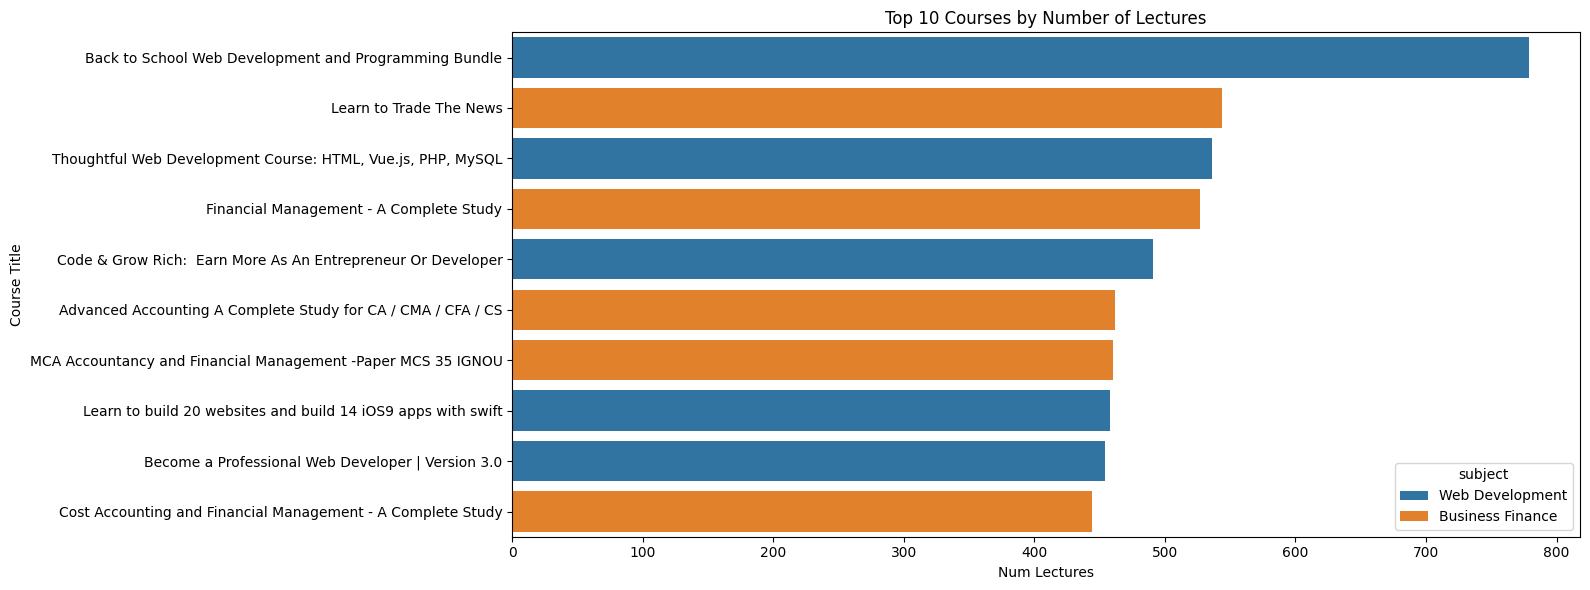

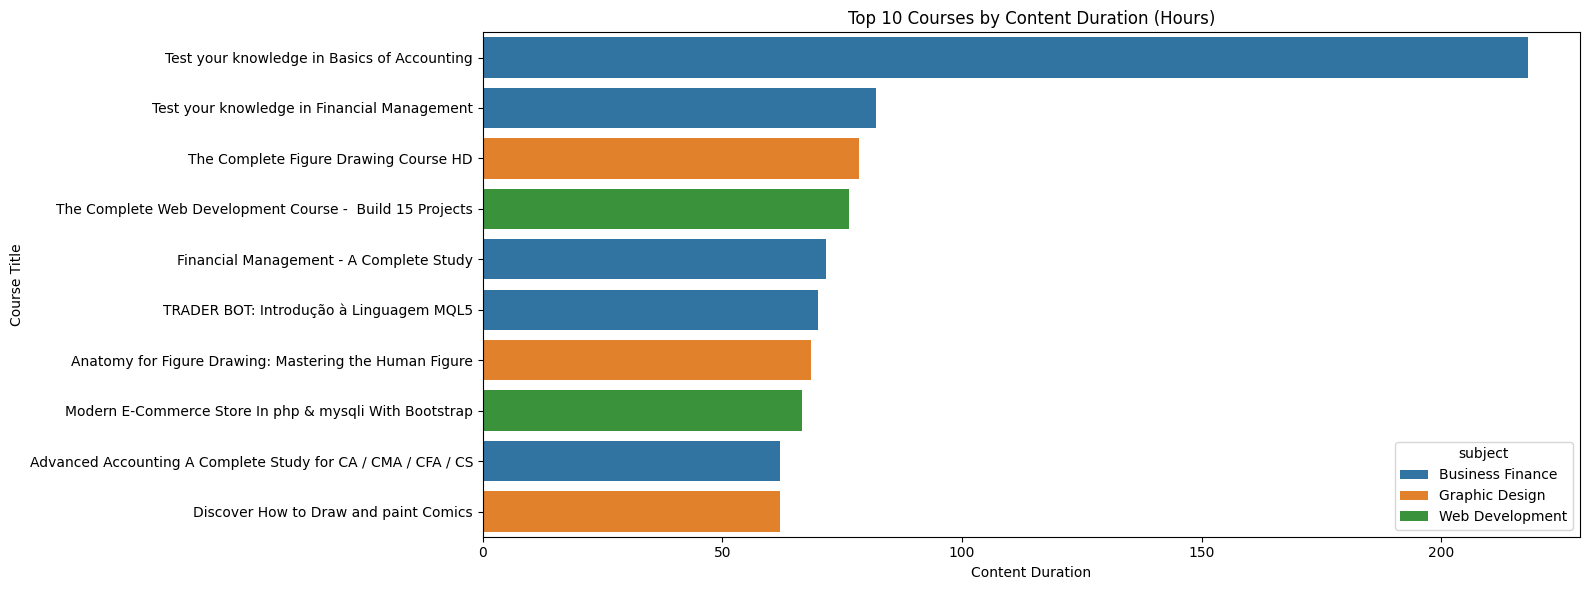

In [22]:
for metric, title in metrics:
    plt.figure(figsize=(16, 6))
    top10 = df.sort_values(by=metric, ascending=False).head(10)
    sns.barplot(data=top10, x=metric, y='course_title', hue='subject')
    plt.title(title)
    plt.xlabel(metric.replace('_', ' ').title())
    plt.ylabel('Course Title')
    plt.tight_layout()
    plt.show()

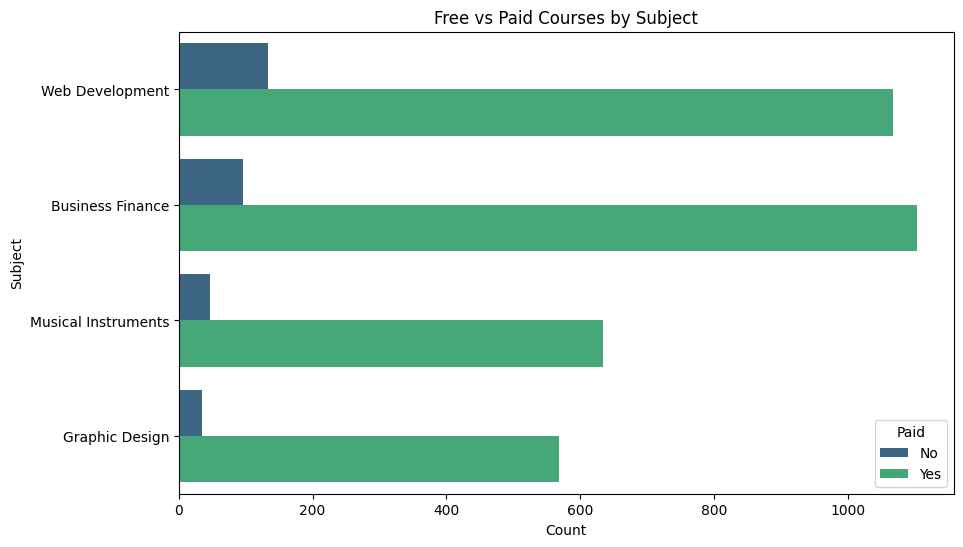

In [23]:
plt.figure(figsize=(10, 6))

sns.countplot(y='subject', data=df, hue='is_paid', order=df['subject'].value_counts().index, palette='viridis')
plt.title('Free vs Paid Courses by Subject')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.legend(title='Paid', labels=['No', 'Yes'])
plt.show()

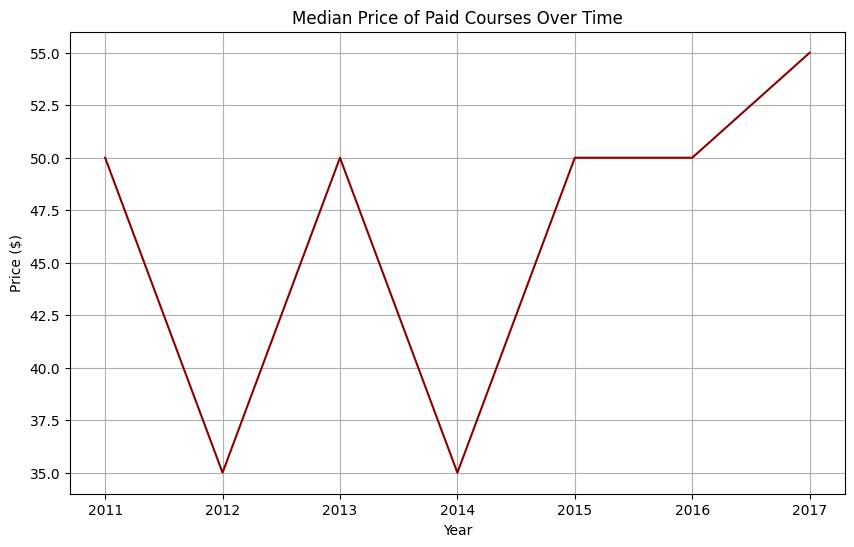

In [24]:
plt.figure(figsize=(10, 6))

paid_df = df[df['is_paid'] == True]
sns.lineplot(x='year', y='price', data=paid_df, estimator='median', ci=None, color='darkred')

plt.title('Median Price of Paid Courses Over Time')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

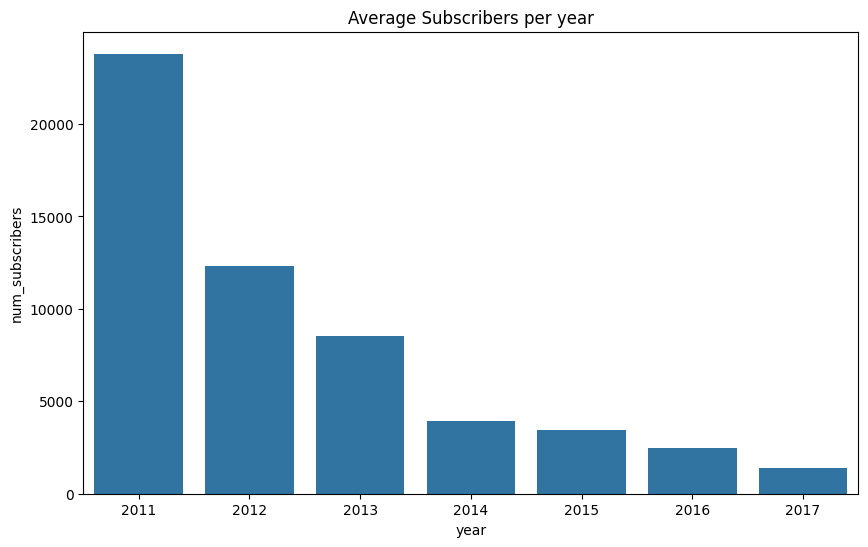

In [ ]:
yearly = df.groupby('year')['num_subscribers'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly, x='year', y='num_subscribers')
plt.title('Average Subscribers per year')
plt.show()

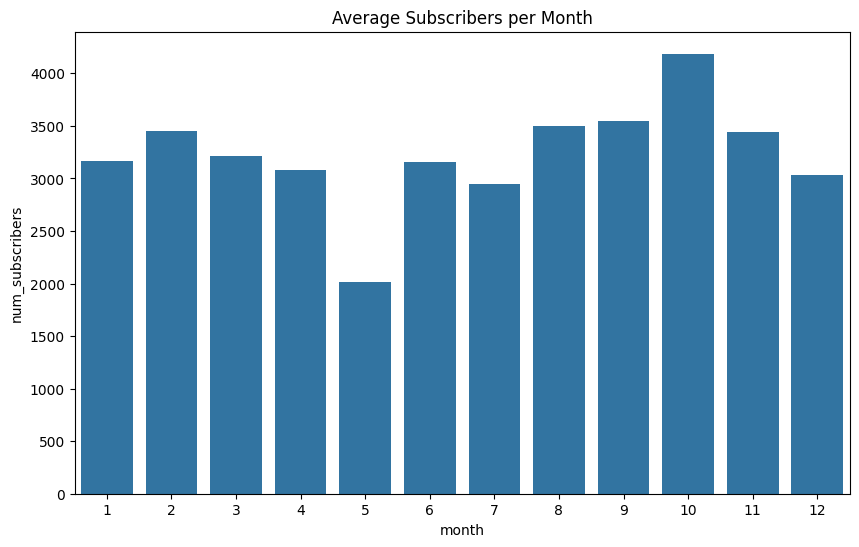

In [41]:
monthly = df.groupby('month')['num_subscribers'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly, x='month', y='num_subscribers')
plt.title('Average Subscribers per Month')
plt.show()

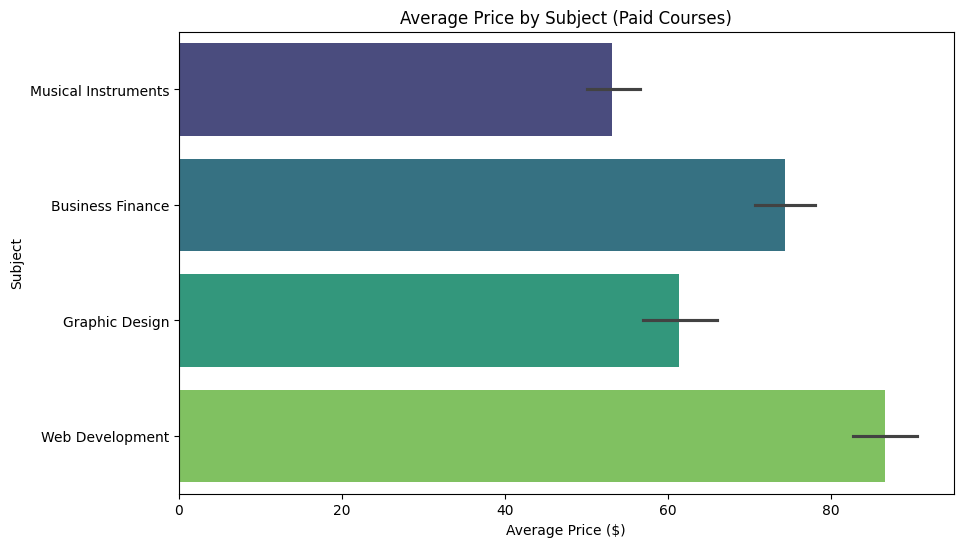

In [25]:
paid_courses = df[df['is_paid']]
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='subject', data=paid_courses, palette='viridis', estimator='mean')
plt.title('Average Price by Subject (Paid Courses)')
plt.xlabel('Average Price ($)')
plt.ylabel('Subject')
plt.show()

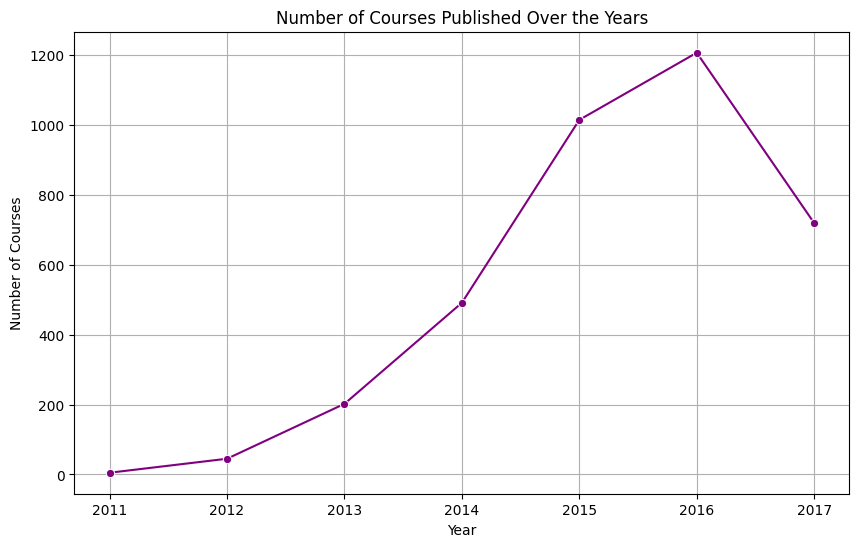

In [26]:
df['published_year'] = df['published_timestamp'].dt.year
yearly_counts = df['published_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='purple')
plt.title('Number of Courses Published Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Courses')
plt.grid(True)
plt.show()

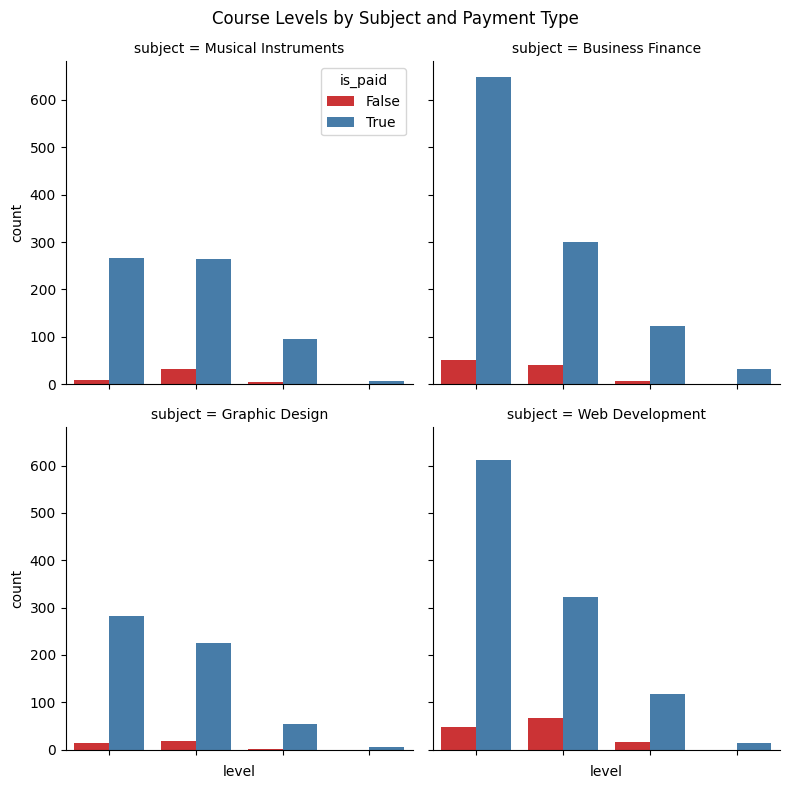

In [27]:
level_order = df['level'].value_counts().index

g = sns.catplot(
    data=df,
    kind='count',
    x='level',
    hue='is_paid',
    col='subject',
    col_wrap=2,
    order=level_order,
    palette='Set1',
    height=4,legend_out=False,
)


g.set_xticklabels(rotation=45, ha='right')
g.fig.suptitle('Course Levels by Subject and Payment Type')
plt.tight_layout()
plt.show()


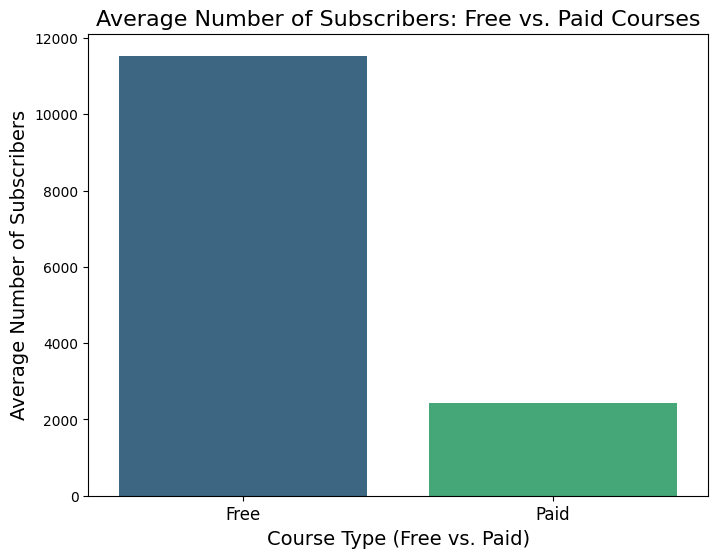

In [28]:
plt.figure(figsize=(8, 6))

comparison = df.groupby('is_paid')['num_subscribers'].mean().reset_index()
sns.barplot(x='is_paid', y='num_subscribers', data=comparison, palette='viridis')
plt.title('Average Number of Subscribers: Free vs. Paid Courses', fontsize=16)
plt.xlabel('Course Type (Free vs. Paid)', fontsize=14)
plt.ylabel('Average Number of Subscribers', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Free', 'Paid'], fontsize=12)
plt.show()

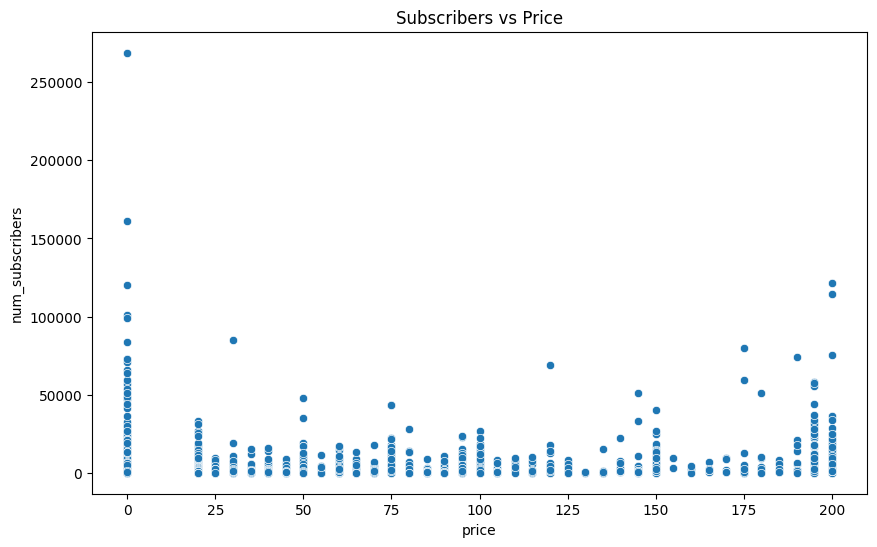

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='num_subscribers')
plt.title('Subscribers by Price')
plt.show()

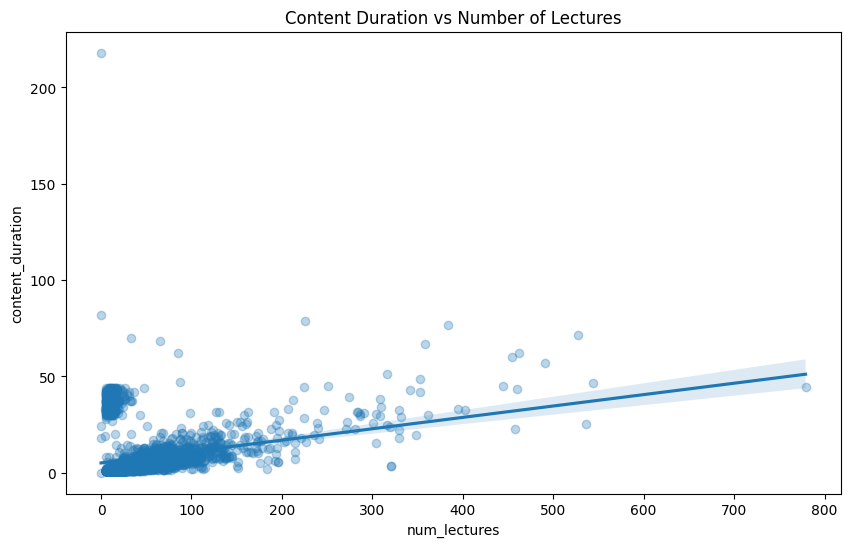

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='num_lectures', y='content_duration', scatter_kws={'alpha':0.3})
plt.title('Content Duration vs Number of Lectures')
plt.show()

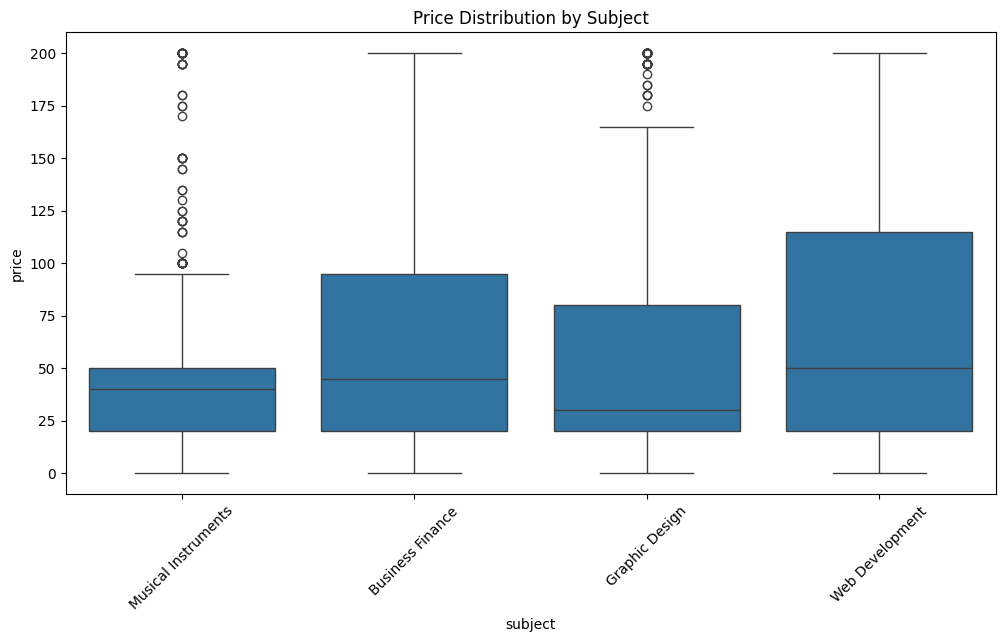

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='subject', y='price')
plt.title('Price Distribution by Subject')
plt.xticks(rotation=45)
plt.show()

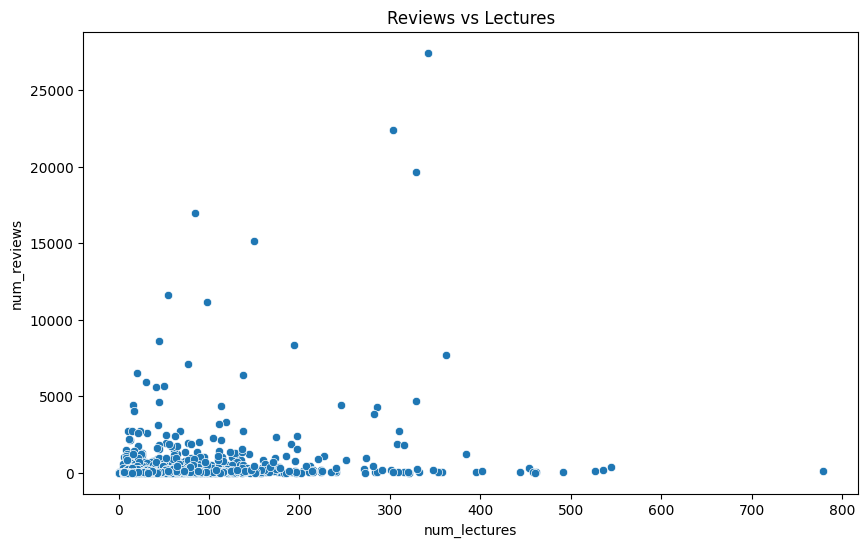

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_lectures', y='num_reviews')
plt.title('Reviews vs Lectures')
plt.show()

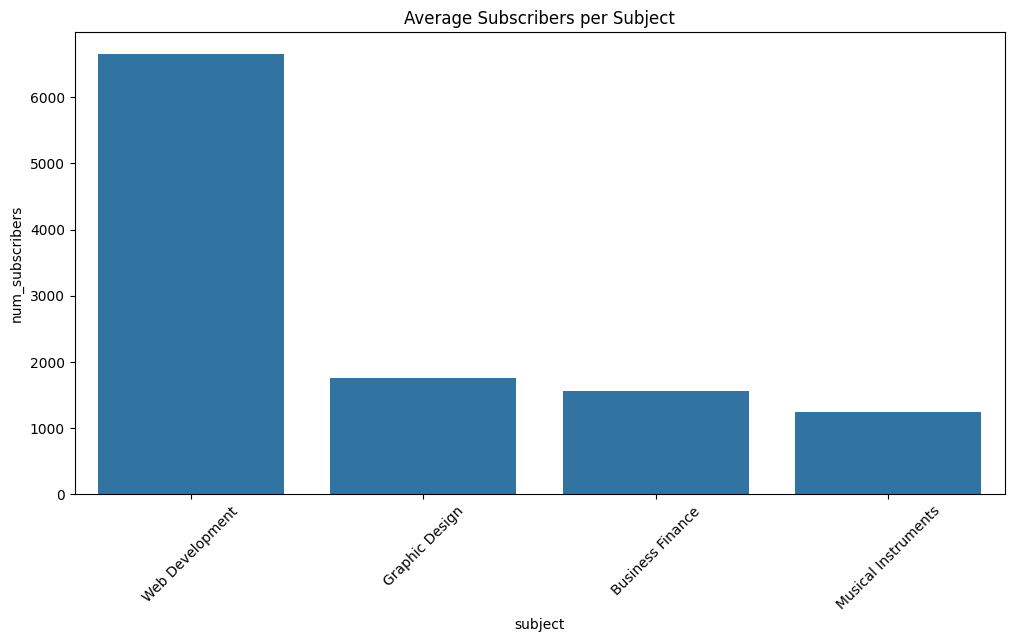

In [38]:
sub_avg = df.groupby('subject')['num_subscribers'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=sub_avg, x='subject', y='num_subscribers')
plt.title('Average Subscribers per Subject')
plt.xticks(rotation=45)
plt.show()